In [5]:
import pyforest

cities = []
lat = np.random.uniform(-90,90,size = 1000)
long = np.random.uniform(-180,180,size = 1000)
!pip install citipy
from citipy import citipy
Coor = zip(lat,long)
for coordinate in Coor:
    city_name = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city_name not in cities:
        cities.append(city_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing c:\users\tigerman381\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d\citipy-0.0.5-py3-none-any.whl
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)


In [1]:
#Using APIs to extract info from every city
import requests
from datetime import datetime
from config import weather_api_key
city_data = [] 
record_count = 1  
set_count = 1
for i, city in enumerate(cities):

# Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
# Create endpoint URL with each city.
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:

           

#             city_url = url + "&q=" + "Boston"
        city_json = requests.get(city_url).json()
        city_lat = city_json["coord"]["lat"]
        city_lng = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_humidity = city_json["main"]["humidity"]
        city_clouds = city_json["clouds"]["all"]
        city_country = city_json["sys"]["country"]
        city_wind = city_json["wind"]["speed"]
        city_date = city_json['dt']
        city_date = datetime.utcfromtimestamp(city_date).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({"City": city,
                                  "Lat": city_lat,
                                  "Lng": city_lng,
                                  "Max Temp": city_max_temp,
                                  "Humidity": city_humidity,
                                  "Cloudiness": city_clouds,
                                  "Wind Speed": city_wind,
                                  "Country": city_country,
                                  "Date": city_date})
    except:
        print('City not found')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1080x504 with 0 Axes>

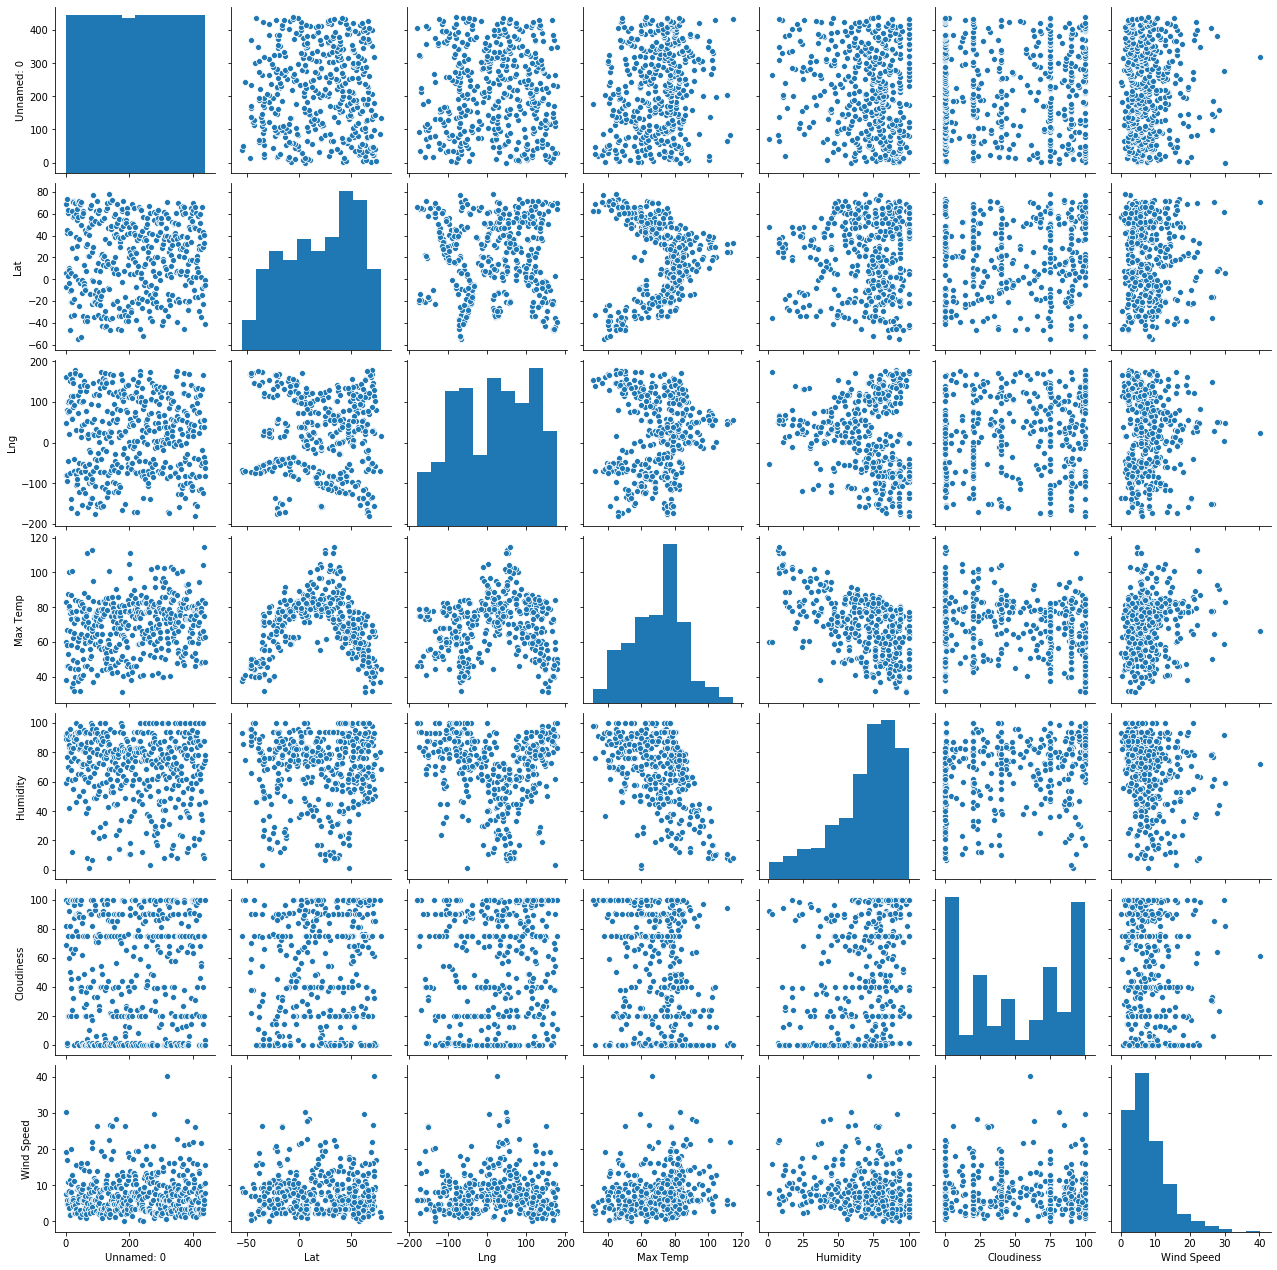

In [4]:
df = pd.read_csv('City_weather.csv')

import time
time.strftime('%x')

city_data_df = df
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

f = plt.figure(figsize = (15,7))

sns.pairplot(city_data_df)


In [5]:
print('Hello')

Hello
